In [143]:
import numpy as np

In [144]:
import pandas as pd

In [145]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [146]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [147]:
!pip install --upgrade chromedriver-py

  Obtaining dependency information for chromedriver-py from https://files.pythonhosted.org/packages/36/8a/833d86c7735cfb90116d8a39cf4b2dfaf8e8201618521006681af935fb90/chromedriver_py-135.0.7049.97-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 MB 11.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: chromedriver-py
    Found existing installation: chromedriver-py 135.0.7049.95
    Uninstalling chromedriver-py-135.0.7049.95:
      Successfully uninstalled chromedriver-py-135.0.7049.95


In [148]:
from chromedriver_py import binary_path

In [149]:
service = Service(executable_path=binary_path)

# Pull Data From YFinance

## World Indices

In [150]:
lst_world = []

driver = webdriver.Chrome(service = service)

driver.get('https://finance.yahoo.com/markets/world-indices/')

for count in range(50):
    
    try:
        XPATH = f'//*[@id="nimbus-app"]/section/section/section/article/section[1]/div/div/div/table/tbody/tr[{count}]/td[1]/div/span/a/div/span'
        element = driver.find_element(By.XPATH, XPATH)

        lst_world.append(element.text)

        
    except:
        pass

driver.close()

In [151]:
lst_world

['^GSPC',
 '^DJI',
 '^IXIC',
 '^NYA',
 '^XAX',
 '^BUK100P',
 '^RUT',
 '^VIX',
 '^FTSE',
 '^GDAXI',
 '^FCHI',
 '^STOXX50E',
 '^N100',
 '^BFX',
 'MOEX.ME',
 '^HSI',
 '^STI',
 '^AXJO',
 '^AORD',
 '^BSESN',
 '^JKSE',
 '^KLSE',
 '^NZ50',
 '^KS11',
 '^TWII',
 '^GSPTSE',
 '^BVSP',
 '^MXX',
 '^IPSA',
 '^MERV',
 '^TA125.TA',
 '^CASE30',
 '^JN0U.JO',
 'DX-Y.NYB',
 '^125904-USD-STRD',
 '^XDB',
 '^XDE',
 '000001.SS',
 '^N225',
 '^XDN',
 '^XDA']

## Futures

In [152]:
lst_fut = []

driver = webdriver.Chrome(service = service)

driver.get('https://finance.yahoo.com/markets/commodities/')

for count in range(40):
    
    try:
        
        XPATH = f'//*[@id="nimbus-app"]/section/section/section/article/section[1]/div/div/div/table/tbody/tr[{count}]/td[1]/div/span/a/div/span'
        element = driver.find_element(By.XPATH, XPATH)

        lst_fut.append(element.text)

        
    except:
        pass

driver.close()

In [153]:
lst_fut

['ES=F',
 'YM=F',
 'NQ=F',
 'RTY=F',
 'ZB=F',
 'ZN=F',
 'ZF=F',
 'ZT=F',
 'GC=F',
 'MGC=F',
 'SI=F',
 'SIL=F',
 'PL=F',
 'HG=F',
 'PA=F',
 'CL=F',
 'HO=F',
 'NG=F',
 'RB=F',
 'BZ=F',
 'B0=F',
 'ZC=F',
 'ZO=F',
 'KE=F',
 'ZR=F',
 'ZM=F',
 'ZL=F',
 'ZS=F',
 'GF=F',
 'HE=F',
 'LE=F',
 'CC=F',
 'KC=F',
 'CT=F',
 'LBS=F',
 'OJ=F',
 'SB=F']

## Currencies

In [154]:
lst_cur = []

driver = webdriver.Chrome(service = service)

driver.get('https://finance.yahoo.com/markets/currencies/')

for count in range(25):
    
    try:
        
        XPATH = f'//*[@id="nimbus-app"]/section/section/section/article/section[1]/div/div/div/table/tbody/tr[{count}]/td[1]/div/span/a/div/span'
        element = driver.find_element(By.XPATH, XPATH)

        lst_cur.append(element.text)

        
    except:
        pass

driver.close()

In [155]:
lst_cur

['EURUSD=X',
 'JPY=X',
 'GBPUSD=X',
 'AUDUSD=X',
 'NZDUSD=X',
 'EURJPY=X',
 'GBPJPY=X',
 'EURGBP=X',
 'EURCAD=X',
 'EURSEK=X',
 'EURCHF=X',
 'EURHUF=X',
 'CNY=X',
 'HKD=X',
 'SGD=X',
 'INR=X',
 'MXN=X',
 'PHP=X',
 'IDR=X',
 'THB=X',
 'MYR=X',
 'ZAR=X',
 'RUB=X']

## Pull ticker results

In [321]:
import yfinance as yf
import time

In [322]:
df_all = yf.download(lst_world + lst_fut + lst_cur + ['BTC-USD'], period='max')

[*********************100%***********************]  102 of 102 completed

2 Failed downloads:
['^CASE30']: YFInvalidPeriodError("^CASE30: Period 'max' is invalid, must be of the format 1d, 5d, etc.")
['B0=F']: YFInvalidPeriodError("B0=F: Period 'max' is invalid, must be of the format 1d, 5d, etc.")


In [323]:
df_all

Price      Adj Close                Close                               \
Ticker          B0=F ^CASE30    000001.SS  AUDUSD=X B0=F       BTC-USD   
Date                                                                     
1927-12-30       NaN     NaN          NaN       NaN  NaN           NaN   
1928-01-03       NaN     NaN          NaN       NaN  NaN           NaN   
1928-01-04       NaN     NaN          NaN       NaN  NaN           NaN   
1928-01-05       NaN     NaN          NaN       NaN  NaN           NaN   
1928-01-06       NaN     NaN          NaN       NaN  NaN           NaN   
...              ...     ...          ...       ...  ...           ...   
2025-04-19       NaN     NaN          NaN       NaN  NaN  85063.414062   
2025-04-20       NaN     NaN          NaN       NaN  NaN  85174.304688   
2025-04-21       NaN     NaN  3291.434082       NaN  NaN  87518.906250   
2025-04-22       NaN     NaN  3299.757080  0.642199  NaN  93441.890625   
2025-04-23       NaN     NaN  3296.355225  0.641026  NaN  93835.125000   

Price                                             ...       Volume  \
Ticker           BZ=F    CC=F       CL=F   CNY=X  ...         ^STI   
Date                                              ...                
1927-12-30        NaN     NaN        NaN     NaN  ...          NaN   
1928-01-03        NaN     NaN        NaN     NaN  ...          NaN   
1928-01-04        NaN     NaN        NaN     NaN  ...          NaN   
1928-01-05        NaN     NaN        NaN     NaN  ...          NaN   
1928-01-06        NaN     NaN        NaN     NaN  ...          NaN   
...               ...     ...        ...     ...  ...          ...   
2025-04-19        NaN     NaN        NaN     NaN  ...          NaN   
2025-04-20        NaN     NaN        NaN     NaN  ...          NaN   
2025-04-21  66.260002  8810.0  63.080002     NaN  ...  215931300.0   
2025-04-22  67.440002  9310.0  64.309998  7.2990  ...  275127500.0   
2025-04-23  67.349998  8832.0  63.590000  7.2872  ...          0.0   

Price                                                                        
Ticker       ^STOXX50E   ^TA125.TA      ^TWII ^VIX ^XAX ^XDA ^XDB ^XDE ^XDN  
Date                                                                         
1927-12-30         NaN         NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1928-01-03         NaN         NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1928-01-04         NaN         NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1928-01-05         NaN         NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1928-01-06         NaN         NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...                ...         ...        ...  ...  ...  ...  ...  ...  ...  
2025-04-19         NaN         NaN        NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2025-04-20         NaN  14903700.0        NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2025-04-21         NaN  31612700.0  2325500.0  0.0  0.0  0.0  0.0  0.0  0.0  
2025-04-22  24478700.0  70225300.0  2526000.0  0.0  0.0  0.0  0.0  0.0  0.0  
2025-04-23         0.0         0.0        0.0  0.0  0.0  NaN  0.0  0.0  0.0  

[26122 rows x 512 columns]

In [324]:
# unstack, and pivot back to OCLH format
df_unstack = df_all.unstack().reset_index().rename(columns={0:'value'})

In [325]:
df_all = df_unstack[df_unstack['Price']!='Adj Close'].dropna().pivot(index = 'Ticker Date'.split(),columns='Price',values='value').reset_index().sort_values('Ticker Date'.split())

In [326]:
df_all

Price,Ticker,Date,Close,High,Low,Open,Volume
0,000001.SS,1997-07-02,1199.061035,1261.571045,1147.331055,1255.909058,0.0
1,000001.SS,1997-07-03,1150.623047,1194.676025,1149.939941,1194.676025,0.0
2,000001.SS,1997-07-04,1159.342041,1163.249023,1124.776001,1138.921021,0.0
3,000001.SS,1997-07-07,1096.818970,1163.447021,1085.572021,1161.707031,0.0
4,000001.SS,1997-07-08,1109.666016,1115.432983,1066.043945,1092.798950,0.0
...,...,...,...,...,...,...,...
662199,^XDN,2025-04-16,70.535004,70.599998,69.998001,70.092003,0.0
662200,^XDN,2025-04-17,70.212997,70.469002,70.068001,70.127998,0.0
662201,^XDN,2025-04-21,70.957001,71.144997,70.901001,71.026001,0.0
662202,^XDN,2025-04-22,70.667999,71.320999,70.586998,71.299004,0.0


In [327]:
df_all['ym'] = pd.to_datetime(df_all['Date']).dt.strftime('%Y-%m')

In [328]:
# get open per ym
df_open = df_all['Ticker ym Open'.split()].groupby('Ticker ym'.split()).first().reset_index()

# get close per ym
df_close = df_all['Ticker ym Close'.split()].groupby('Ticker ym'.split()).last().reset_index()

# get high per ym
df_high = df_all['Ticker ym High'.split()].groupby('Ticker ym'.split()).max().reset_index()

# get low per ym
df_low = df_all['Ticker ym Low'.split()].groupby('Ticker ym'.split()).min().reset_index()

In [329]:
# # get monthly values
# df_all = df_open.merge(df_close,on='Ticker ym'.split()).merge(df_high,on='Ticker ym'.split()).merge(df_low,on='Ticker ym'.split())

In [330]:
df_close = df_close.pivot(index='ym',columns='Ticker',values='Close')

In [331]:
# capture yoy change
df_yoy = (df_close - df_close.shift(12))/df_close.shift(12)

In [332]:
df_yoy

Ticker,000001.SS,AUDUSD=X,BTC-USD,BZ=F,CC=F,CL=F,CNY=X,CT=F,DX-Y.NYB,ES=F,...,^STI,^STOXX50E,^TA125.TA,^TWII,^VIX,^XAX,^XDA,^XDB,^XDE,^XDN
ym,,,,,,,,,,,,,,,,,,,,,
1927-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12,0.126668,-0.088819,1.210547,-0.031153,1.782412,0.000977,0.026889,-0.155556,0.070660,0.231483,...,0.168915,0.076881,0.286024,0.284666,0.393574,0.020016,NaN,NaN,NaN,NaN
2025-01,0.165697,-0.057591,1.404856,-0.060580,1.278515,-0.043771,0.012236,-0.226488,0.049385,0.245714,...,0.222901,0.137353,0.339878,0.315036,0.144948,0.088931,NaN,NaN,NaN,NaN
2025-02,0.101396,-0.040418,0.378680,-0.124851,0.384639,-0.108612,0.012410,-0.371012,0.033122,0.168406,...,0.239938,0.120090,0.280499,0.215451,0.464925,0.092248,NaN,NaN,NaN,NaN


In [333]:
# index into columns that have values for current date
df_yoy = df_yoy[df_yoy.columns[df_yoy.iloc[-1,:].notna()]].copy()

### filter for normally distributed YoY changes

In [334]:
from scipy.stats import normaltest

lst_col = []

for col in df_yoy.columns[~df_yoy.columns.str.contains('_lag')]:
    
    try:
        sta,pval = normaltest(df_yoy[col].dropna())
        print(col,pval)
    
        if pval<.05:
            lst_col.append(col)
    except:
        lst_col.append(col)

df_yoy = df_yoy[df_yoy.columns[~df_yoy.columns.str.contains('|'.join(lst_col))]].copy()

000001.SS 1.2771165551173154e-41
AUDUSD=X 0.00010968993467985734
BTC-USD 2.6659538838436564e-18
BZ=F 7.773383664343624e-10
CC=F 2.2110735407755323e-37
CL=F 7.266749099172437e-20
CNY=X 0.382040394803237
CT=F 8.716620510188932e-14
DX-Y.NYB 0.6012052227240767
ES=F 8.619945066913633e-06
EURCAD=X 0.1755510733117377
EURCHF=X 0.015020200528965822
EURGBP=X 2.8073761256102066e-07
EURHUF=X 0.26706529483327685
EURJPY=X 0.04675654571044954
EURSEK=X 0.05321436438623379
EURUSD=X 0.08537623045034518
GBPJPY=X 1.0304772413988691e-05
GBPUSD=X 5.450115393778865e-26
GC=F 0.3499424182829568
GF=F 0.863430982561537
HE=F 5.774011569272253e-22
HG=F 9.846973951166766e-15
HKD=X 0.4978208967584531
HO=F 1.1267056238118347e-05
IDR=X 0.0008591190054230024
INR=X 1.6110762492597317e-05
JPY=X 0.003910124312800727
KC=F 4.829047172190352e-05
KE=F 3.75651373712331e-10
LE=F 0.5705453689715727
MGC=F 4.5600302548052807e-29
MXN=X 3.460863463661257e-05
MYR=X 1.2646165923143715e-11
NG=F 2.848257414398011e-14
NQ=F 2.699460526783

In [335]:
df_yoy

Ticker,CNY=X,DX-Y.NYB,EURCAD=X,EURHUF=X,EURSEK=X,EURUSD=X,GC=F,GF=F,HKD=X,LE=F,...,^STI,^STOXX50E,^TA125.TA,^TWII,^VIX,^XAX,^XDA,^XDB,^XDE,^XDN
ym,,,,,,,,,,,,,,,,,,,,,
1927-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12,0.026889,0.070660,0.019842,0.075088,0.039948,-0.059815,0.274825,0.183198,-0.006183,0.116165,...,0.168915,0.076881,0.286024,0.284666,0.393574,0.020016,NaN,NaN,NaN,NaN
2025-01,0.012236,0.049385,0.036928,0.052366,0.017610,-0.041142,0.373023,0.148137,-0.003237,0.153651,...,0.222901,0.137353,0.339878,0.315036,0.144948,0.088931,NaN,NaN,NaN,NaN
2025-02,0.012410,0.033122,0.020252,0.017605,0.000071,-0.040936,0.386714,0.104317,-0.006514,0.074592,...,0.239938,0.120090,0.280499,0.215451,0.464925,0.092248,NaN,NaN,NaN,NaN


In [336]:
# determine outliers w/low value counts
s_desc = df_yoy.count().describe()

In [337]:
from HDBSCAN_outlier import *

In [338]:
arr_out,arr_in,clusterer = hdbscan_outlier(df_yoy.count().unique().reshape(-1,1),2)

In [339]:
df_res = pd.concat([pd.Series(df_yoy.count().unique()),pd.Series(clusterer.labels_)],axis=1)

df_res.columns = 'count cluster'.split()

In [340]:
out_low = arr_in.min()

In [341]:
# get inliers
df_yoy = df_yoy[df_yoy.count()[df_yoy.count()>=out_low].index]

<Axes: xlabel='ym'>

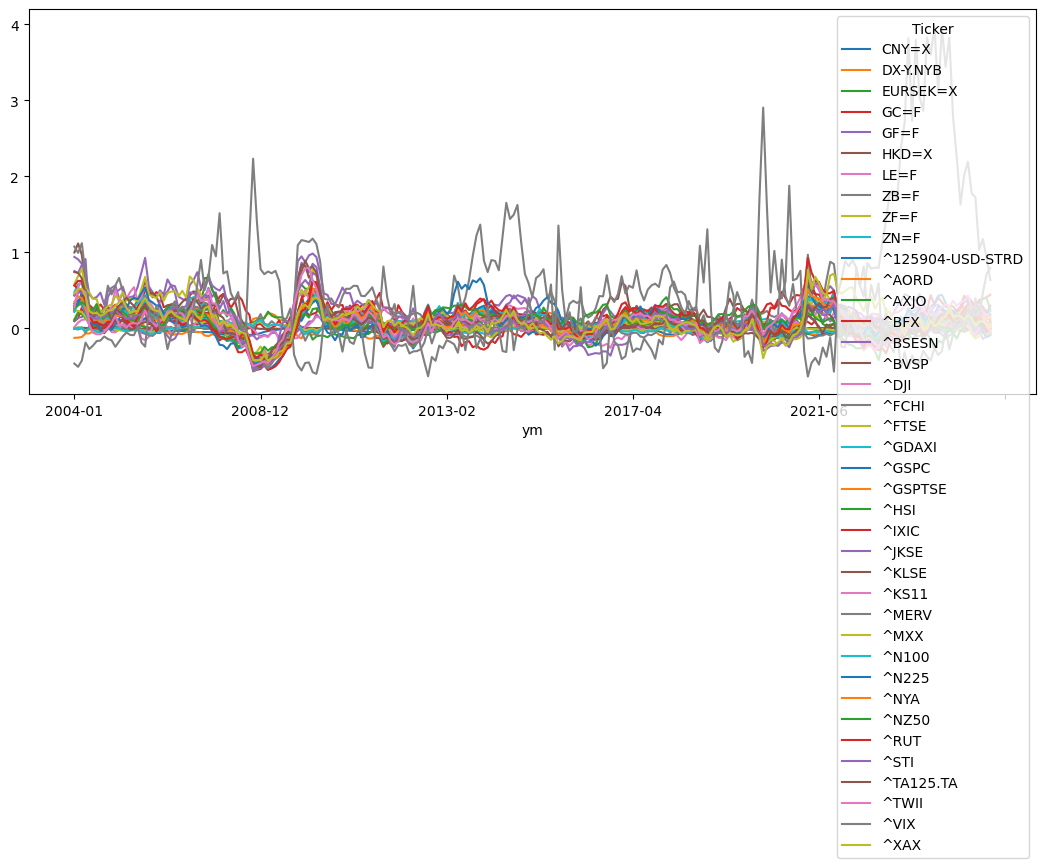

In [342]:
df_yoy.dropna().plot(figsize=(13,5))

In [343]:
# capture lags up to 12 months back
lst_df = [df_yoy]
for i in range(1,13):
    
    df_shift = df_yoy.shift(i)
    df_shift.columns = df_shift.columns+f'_{i}mo_lag'
    lst_df.append(df_shift)
    
df_yoy = pd.concat(lst_df,axis=1).dropna()

In [344]:
df_yoy

Ticker,CNY=X,DX-Y.NYB,EURSEK=X,GC=F,GF=F,HKD=X,LE=F,ZB=F,ZF=F,ZN=F,...,^N100_12mo_lag,^N225_12mo_lag,^NYA_12mo_lag,^NZ50_12mo_lag,^RUT_12mo_lag,^STI_12mo_lag,^TA125.TA_12mo_lag,^TWII_12mo_lag,^VIX_12mo_lag,^XAX_12mo_lag
ym,,,,,,,,,,,,,,,,,,,,,
2005-12,-0.023989,0.127644,0.041343,0.181943,0.132122,-0.002291,0.028937,0.015000,-0.029101,-0.022613,...,0.080398,0.076065,0.121606,0.250618,0.169974,0.170936,0.190048,0.042270,-0.274167,0.222223
2008-02,-0.081017,-0.117985,0.013378,0.452196,0.020177,-0.004378,-0.009529,0.059181,0.085524,0.093264,...,0.112044,0.086310,0.131991,0.185672,0.085760,0.250685,0.179189,0.204268,0.249595,0.145808
2008-03,-0.093047,-0.134210,0.005351,0.381900,-0.086897,-0.004847,-0.104252,0.067837,0.080550,0.100145,...,0.106747,0.013364,0.124936,0.109294,0.046488,0.275456,0.189906,0.192084,0.285338,0.123405
2008-04,-0.093171,-0.109761,0.021162,0.267891,-0.032634,-0.003759,-0.057826,0.046001,0.058172,0.069090,...,0.160644,0.029231,0.136494,0.105258,0.065438,0.287500,0.212110,0.098114,0.226920,0.093360
2008-05,-0.092308,-0.114459,0.003085,0.342360,0.041283,0.000320,0.058969,0.048669,0.061536,0.071082,...,0.265829,0.155710,0.218526,0.190603,0.174991,0.472870,0.285601,0.189573,-0.206204,0.225502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12,0.026889,0.070660,0.039948,0.274825,0.183198,-0.006183,0.116165,-0.088794,-0.019410,-0.036678,...,0.133095,0.282422,0.109889,0.025908,0.150927,-0.003399,0.040660,0.268298,-0.425473,0.110992
2025-01,0.012236,0.049385,0.017610,0.373023,0.148137,-0.003237,0.153651,-0.068966,-0.018452,-0.031020,...,0.073077,0.327865,0.054547,-0.014909,0.007971,-0.063185,0.023836,0.171918,-0.260309,0.023957
2025-02,0.012410,0.033122,0.000071,0.386714,0.104317,-0.006514,0.074592,-0.007862,0.011590,0.010377,...,0.081193,0.427050,0.141193,-0.015066,0.083211,-0.037019,0.146410,0.223363,-0.352657,0.059973


In [346]:
from pca import *

In [347]:
## scale our macro variables for PCA
d_scale = scale_df(df_yoy,
                   scale_type = 'mm',
                   famd=False,
                   s_wt=None,
                   yj=True)

## perform PCA
d_pca = pca(d_scale['df_scaled'], 
            d_scale['pt'], d_scale['scaler'],
            d_scale['df_famd'],
            d_scale['s_wt'])
df_pca = d_pca['df_pca']

## NOW CLUSTER OUR MACRO DATA INTO EPOCHS
## find optimal parameters based on unique rows
X = df_pca.drop_duplicates()

## min max scale
s_min = X.min()
s_max = X.max()

X = (X-s_min) / (s_max-s_min)

lst_db_score = []
lst_adj_score = []
lst_tup_param = []

for min_size in [int(np.log(X.shape[0])),int(np.sqrt(X.shape[0]))]:

    ### select for epsilon values based on min pts
    # instantiate nearest neighbors model and get distances to optimize for epsilon
    neigh = NearestNeighbors(n_neighbors= min_size , metric = 'euclidean')

    neigh.fit(X)

    distances, indices = neigh.kneighbors(X)

    # isolate the unique distances of the nth nearest neighbor
    distances = np.sort(distances[:,-1])

    # look for the inflection point
    lst_eps = find_elbow(distances,cv='convex')

    for eps in lst_eps:

        for min_samp in [int(np.log(X.shape[0])),int(np.sqrt(X.shape[0]))]:

            for method in 'eom leaf'.split():
                ## fit HDBSCAN model to identify outliers
                try:
                    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_size,
                                                min_samples=min_samp,
                                                cluster_selection_epsilon=eps,
                                                cluster_selection_method = method)
                    clusterer.fit(X)

                    lst_tup_param.append((min_size,min_samp,eps,method))

                    lst_db_score.append(davies_bouldin_score(X, clusterer.labels_))
                    
                except:
                    pass


params = lst_tup_param[np.argmin(lst_db_score)]

min_size = params[0]
min_samp = params[1]
eps = params[2]
method = params[3]

clusterer = hdbscan.HDBSCAN(min_cluster_size=min_size,
                            min_samples=min_samp,
                            cluster_selection_epsilon=eps,
                            cluster_selection_method = method)
# fit clusterer regardless of duplicate rows
X = df_pca.copy()
clusterer.fit(X)

# reverse transform 
X = X*(s_max - s_min) + s_min

X['Cluster'] = clusterer.labels_

X['Cluster'] = X['Cluster']+1

idx_out = X[X['Cluster'] == 0].index

X.loc[idx_out,'Cluster'] = -1

df_yoy.loc[X.index,'Cluster'] = X['Cluster'].copy().astype('str')

In [355]:
import matplotlib.pyplot as plt
%matplotlib inline

In [356]:
import seaborn as sns

In [363]:
df_un = df_yoy.drop(columns=['Cluster']).unstack().reset_index()
df_c = df_yoy['Cluster'].reset_index()

In [371]:
df_c

,ym,Cluster
0,2005-12,-1
1,2008-02,-1
2,2008-03,2
3,2008-04,2
4,2008-05,2
...,...,...
203,2024-12,4
204,2025-01,4
205,2025-02,4
206,2025-03,4


In [365]:
df_un.columns = 'Ticker ym YoY_chg'.split()

In [368]:
df_plot = df_un.merge(df_c,on='ym')

df_plot = df_plot[~df_plot['Ticker'].str.contains('lag')].copy()

In [369]:
df_plot['ym'] = pd.to_datetime(df_plot['ym'])

<Axes: xlabel='ym', ylabel='YoY_chg'>

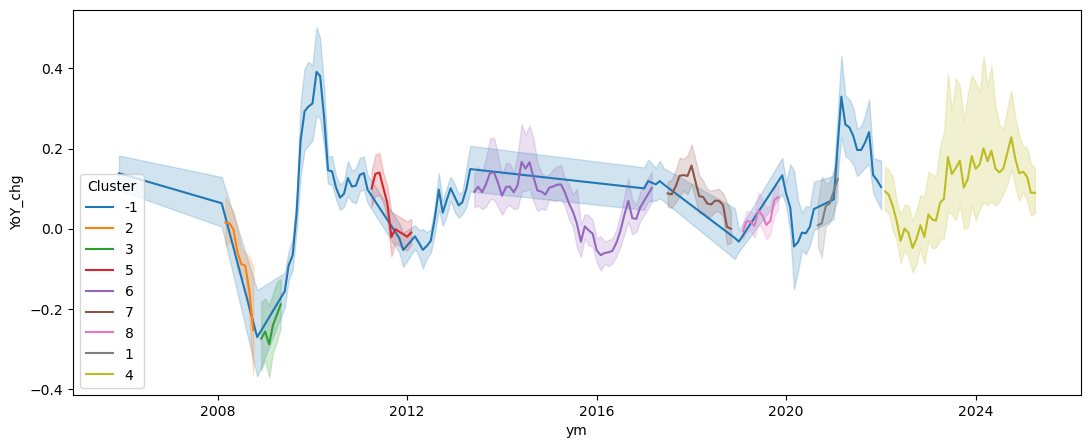

In [370]:
fig,ax = plt.subplots(figsize=(13,5))

sns.lineplot(df_plot,
             x='ym',
             y='YoY_chg',
             hue='Ticker',
             ax=ax)